# Principal Component Analysis

#### Ing.Luis Felipe Narvaez Gomez. E-mail: luis.narvaez@usantoto.edu.co. Cod: 2312660. Facultad de Ingenieria de Sistemas. USTA.

References:

1. https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
2. https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Principal-Components-Rotation


## EigenFaces

Importemos las librerias base:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from IPython.display import Image

from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
import matplotlib.cm

Ya habiamos realizado este ejercicio de forma similar con SVM, un algoritmo que utiliza el proceso supervizado para su estimacion de los datos, en este caso lo haremos con PCA, un algoritmo que no es supervisado.

Recordemos un poquito de SVM, primero importemos el dataset a utilizar.

In [2]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Echemos un vistazo a los ejes principales que abarcan este conjunto de datos. Debido a que este es un conjunto de datos grande, usaremos $RandomizedPCA$ la es un **version alterna de PCA** que contiene un metodo aleatorio para aproximar los $N$ componentes principales mucho mas rapido que el $clasico PCA$ , por lo que, es muy util para datos de alta dimencion (de hasta casi 3000 dimenciones ¡alv!).

Trabajemos con los primeros 150 componentes:

In [4]:
# from sklearn.decomposition import RandomizedPCA
from sklearn.decomposition import PCA as RandomizedPCA

pca = RandomizedPCA(150)
pca.fit(faces.data)

PCA(n_components=150)

En este caso, puede ser interesante visualizar las imágenes asociadas con los primeros componentes principales (estos componentes se conocen técnicamente como "vectores propios", por lo que este tipo de imágenes a menudo se denominan "caras propias"). Como puede ver en esta figura, son tan espeluznantes como suenan:

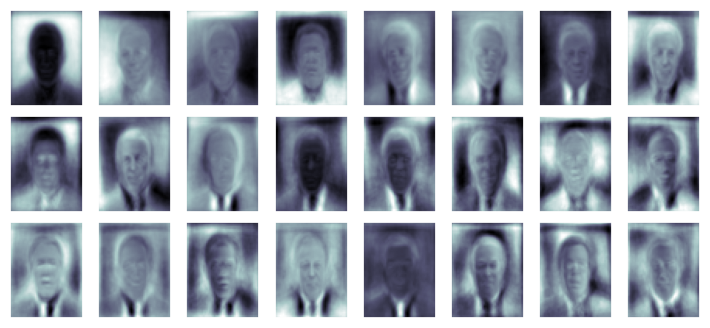

In [5]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

Los resultados son muy interesantes y nos dan una idea de cómo varían las imágenes: por ejemplo, las primeras caras propias (desde la parte superior izquierda) parecen estar asociadas con el ángulo de iluminación en la cara, y los vectores principales posteriores parecen estar eligiendo ciertos rasgos, como ojos, narices y labios. Echemos un vistazo a la varianza acumulada de estos componentes para ver qué parte de la información de datos conserva la proyección:

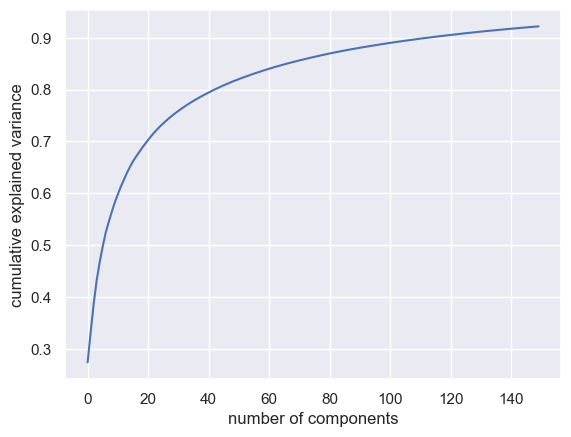

In [6]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Vemos que estos 150 componentes explican poco más del 90% de la varianza. Eso nos llevaría a creer que utilizando estos 150 componentes recuperaríamos la mayor parte de las características esenciales de los datos. Para hacer esto más concreto, podemos comparar las imágenes de entrada con las imágenes reconstruidas a partir de estos 150 componentes:

In [7]:
# Compute the components and projected faces
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

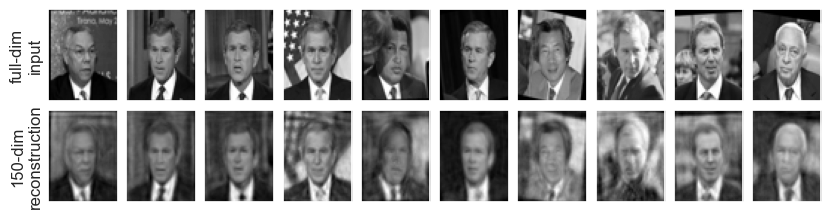

In [8]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

La fila superior aquí muestra las imágenes de entrada, mientras que la fila inferior muestra la reconstrucción de las imágenes de solo 150 de las ~3000 características iniciales. 

Esta visualización deja en claro por qué la selección de funciones de PCA utilizada en la **GUIA de SVM** tuvo tanto éxito: aunque reduce la dimensionalidad de los datos en casi un factor de 20, las imágenes proyectadas contienen suficiente información que podríamos, a simple vista, reconocer a los individuos en la imagen.

Lo que esto significa es que nuestro algoritmo de clasificación debe entrenarse con datos de 150 dimensiones en lugar de datos de 3000 dimensiones, lo que, según el algoritmo particular que elijamos, puede conducir a una clasificación mucho más eficiente.